## Characteristics

Scalar_XYZ is a set of two modules for:

* Generation of 3D masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields

For light generation, scalar_sources_XY.py is used.

**Warning**: This module is not very mature yet.

These modules are named: scalar_fields_XYZ.py,and scalar_masks_XYZ.py.

Each module present a main class:

* Scalar_field_XYZ
* Scalar_masks_XYZ

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.z (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.wavelength (float): wavelength of the incident field.
* self.u (numpy.array): equal size than x * y * z. complex field.


We can also find these atributes:

* self.X (numpy.array): linear 2D array with size x * y * z storing X position.
* self.Y (numpy.array): linear 2D array with size x * y * z storing Y position.
* self.Z (numpy.array): linear 2D array with size x * y * z storing Z position.
* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.info (str): description of data.
* self.fast (bool): If True, Rayleigh-Sommerfeld computations are performed using Fresnel approximation.
* self.type (str): Class of the field.
* self.date (str): date when performed.


In [29]:
from diffractio import degrees, eps, mm, no_date, np, plt, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

In [30]:
import pyvista as pv

pv.set_jupyter_backend("static")
# normally it is better to use 'trame' backend. In this case a png figure is generated.

### save_load

In [31]:
length = 100 * um
numdata = 16  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um
filename = "save_load_xyz.npz"

t1 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

t1.u = np.ones_like(t1.u)
t1.save_data(filename=filename, add_name="")

In [32]:
t2 = Scalar_field_XYZ(x=None, y=None, z=None, wavelength=None)
t2.load_data(filename=filename, verbose=False)

### clear_field

In [33]:
length = 100 * um
numdata = 32  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

u0 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
u0.u = np.ones_like(u0.u)
print(u0.u.max())

u0.clear_field()
print(u0.u.max())

(1+0j)
0j


### show_index_refraccion

In [34]:
length = 150 * um

x0 = np.linspace(-length / 2, length / 2, 128)
y0 = np.linspace(-length / 2, length / 2, 128)
z0 = np.linspace(-length / 2, length / 2, 128)
wavelength = 0.55 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(20 * um, 20 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1.0, info=""
)

rotation = dict(kind='point', point=np.array((0,0,0)), angle=np.array((45*degrees, 0,0)) )

uxyz.incident_field(t1)
uxyz.cylinder(
    r0=(0 * um, 0 * um, 0),
    radius=(20 * um, 20 * um),
    length=75 * um,
    refractive_index=1.5,
    rotation=rotation,
)

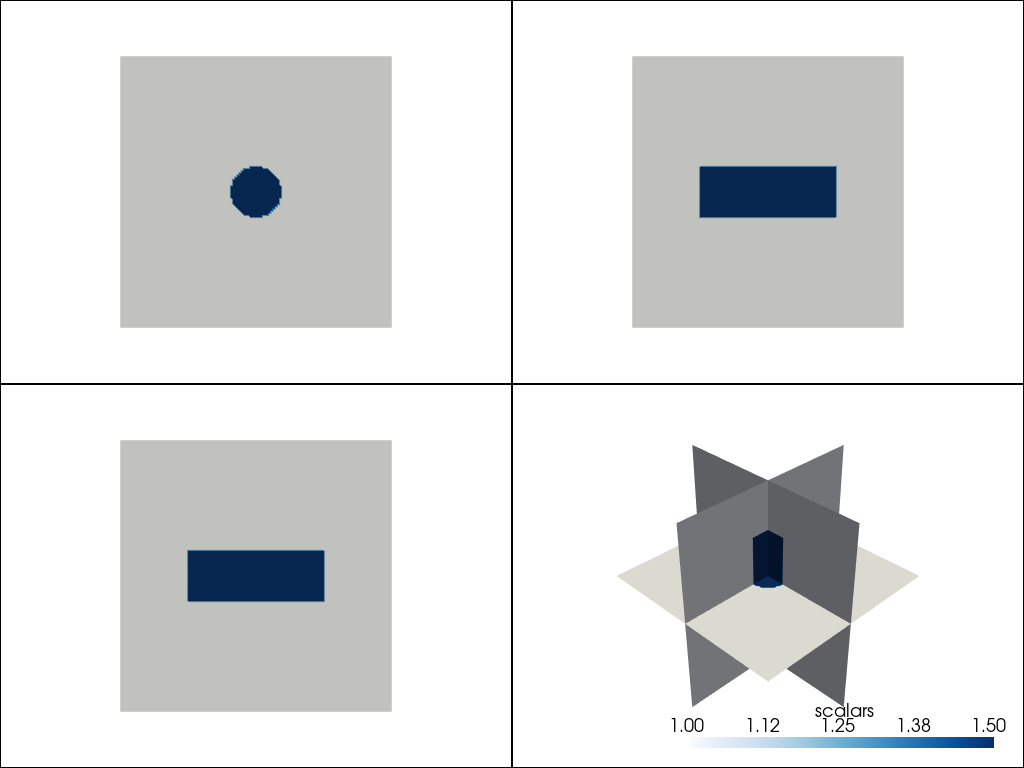

In [35]:
uxyz.draw_XYZ(kind="refractive_index", drawing="projections")

### RS propagation of a circular aperture

In [36]:
length = 100 * um
numdata = 128
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(200 * um, 2 * mm, 128)
wavelength = 0.5 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0 * um, 0 * um), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(25 * um, 25 * um))
t3 = u1 * t1

In [37]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS(num_processors=1)

time in RS= 0.3981056213378906. num proc= 1


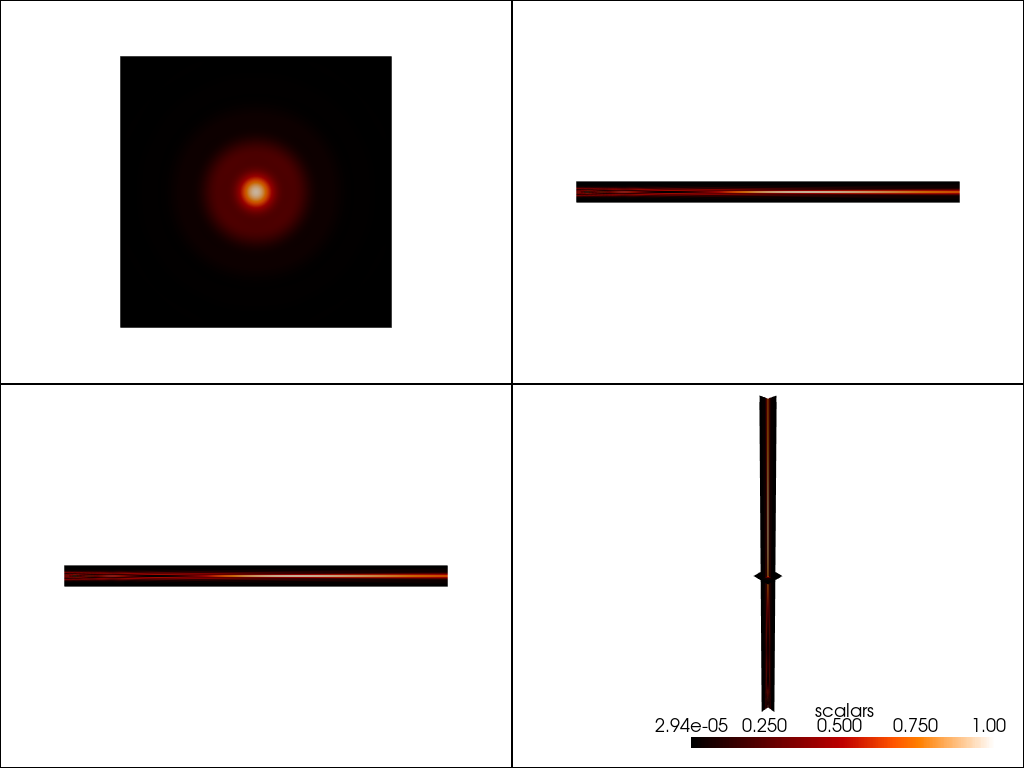

In [38]:
uxyz.draw_XYZ(kind="intensity", drawing="projections")

### Rayleigh-Sommerfeld propagation of a gauss beam passing through a Grating

In [39]:
length = 500 * um
x0 = np.linspace(-length / 2, length / 2, 128)
y0 = np.linspace(-length / 2, length / 2, 128)
z0 = np.linspace(2 * mm, 7 * mm, 128)
wavelength = 0.6328 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0 * um, 0 * um), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(x0=0 * um, period=20 * um, angle=0 * degrees)
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.lens(
    r0=(0 * um, 0 * um),
    radius=(200 * um, 200 * um),
    focal=(5 * mm, 5 * mm),
    angle=0 * degrees,
)

t3 = u1 * t1 * t2

In [40]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()
uxyz.normalize()

time in RS= 0.40485596656799316. num proc= 1


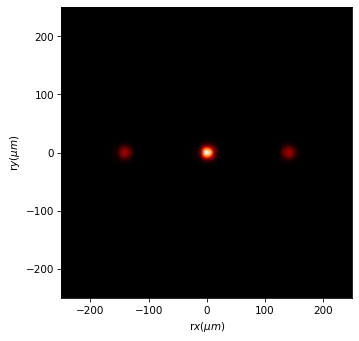

In [41]:
uxyz.draw_XY(z0=4.5 * mm)

A particular plane, can be passed to scalar_field_XY, and then, it can be drawn.

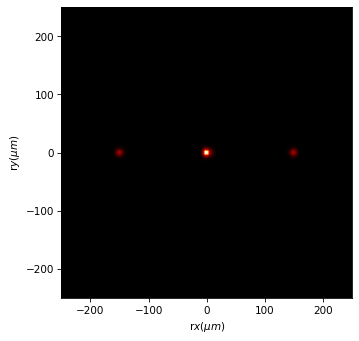

In [42]:
u_xy = uxyz.to_Scalar_field_XY(z0=4.75 * mm, is_class=True, matrix=False)
u_xy.draw(kind="intensity")

Also, the intensity at the XZ plane can be obtained.

<Figure size 480x360 with 0 Axes>

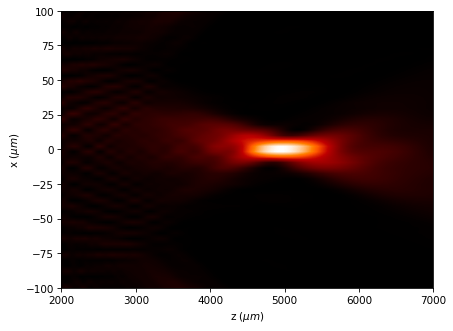

In [43]:
uxyz.draw_XZ(y0=0 * mm, logarithm=1e1, draw_borders=True )
plt.ylim(-100, 100)

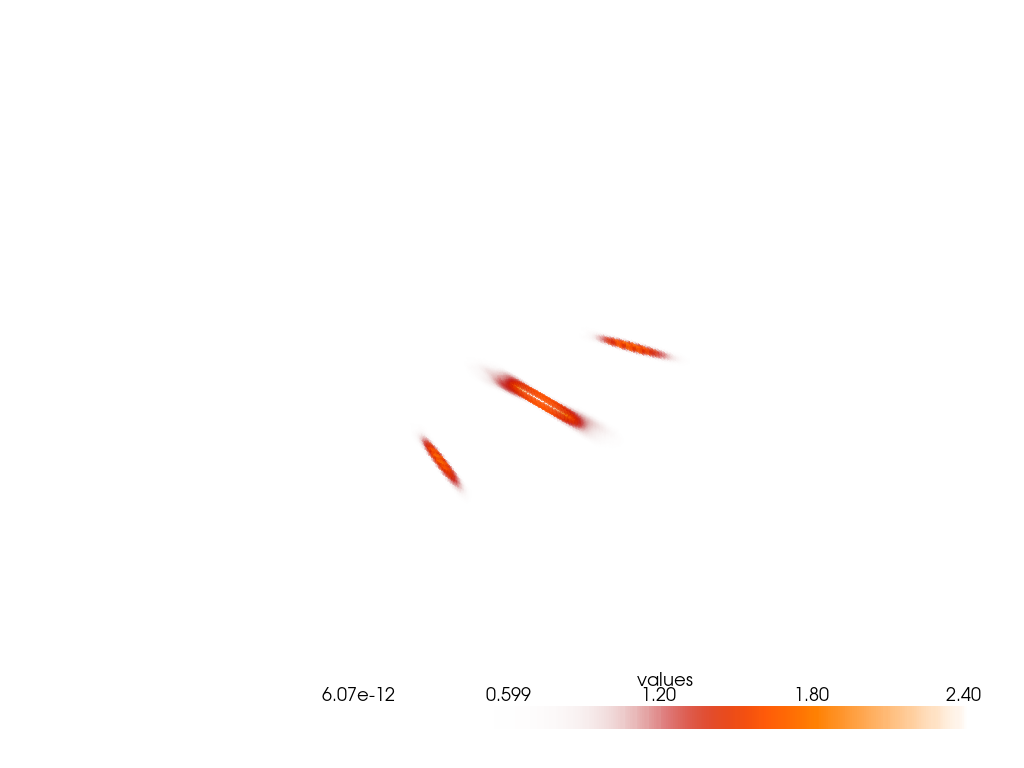

In [44]:
uxyz.draw_XYZ(logarithm=1e1)

### Video from a XYZ distribution

In [45]:
length = 100 * um
numdata = 128  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(200 * um, 2 * mm, 32)  # 128
wavelength = 0.5 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0 * um, 0 * um), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(25 * um, 25 * um))
t3 = u1 * t1

In [46]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()
uxyz.normalize()

time in RS= 0.1189413070678711. num proc= 1


In [47]:
filename = "video_RS"

In [48]:
uxyz.video(filename=filename + "_int.mp4", kind="intensity", frame=False)

[![alt text](https://img.youtube.com/vi/video-id/0.jpg)](./video_RS_int.mp4)

In [49]:
%%HTML
<div align="middle">
      <video width="50%" controls>
            <source src="./video_RS_int.mp4" type="video/mp4">
      </video>
</div>

### benchmark_RS_multiprocessing

In [98]:
x0 = np.linspace(-10 * um, 10 * um, 200)
y0 = np.linspace(-10 * um, 10 * um, 200)
z0 = np.linspace(0 * um, 20 * um, 200)
wavelength = 2 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1.0, info=""
)

rotation = dict(kind='point', point=np.array((0,0,0)), angle=np.array((45*degrees, 0,45*degrees)) )

uxyz.incident_field(u0)
uxyz.sphere(
    r0=(0 * um, 0 * um, 7 * um),
    radius=(10 * um, 10* um, 6 * um),
    refractive_index=3.,
    rotation=None,
)

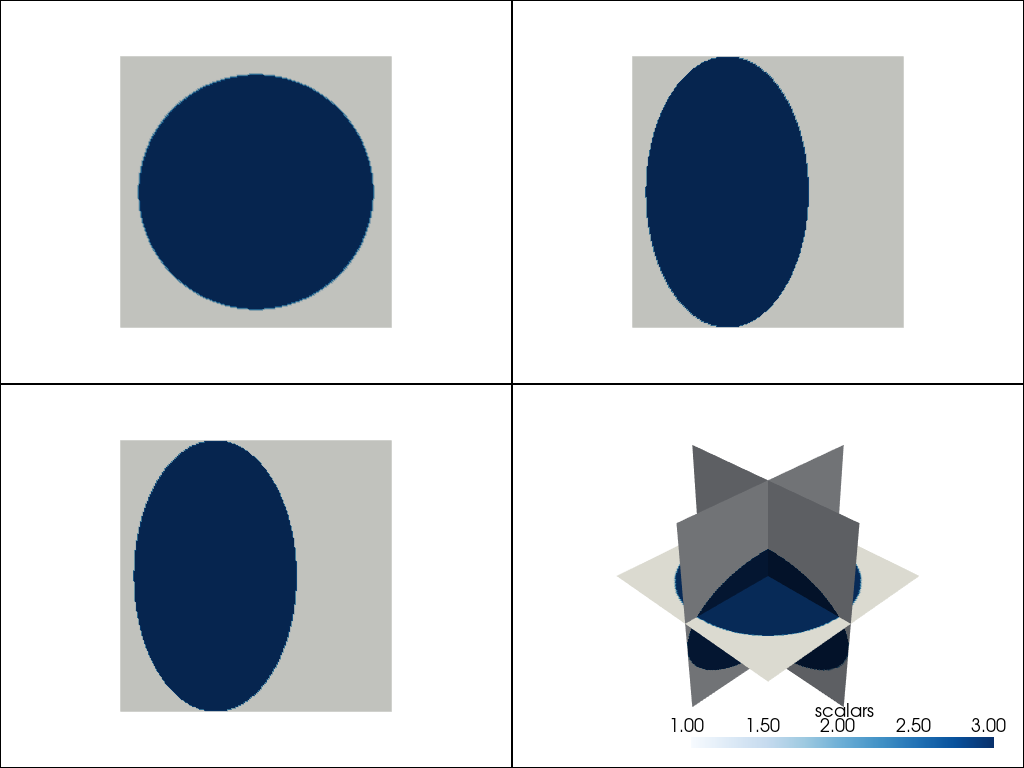

In [99]:
uxyz.draw_XYZ(kind="refractive_index", drawing="projections")

In [100]:
uxyz.WPM(has_edges=False, verbose=True)


Time = 0.84 s, time/loop = 4.189 ms


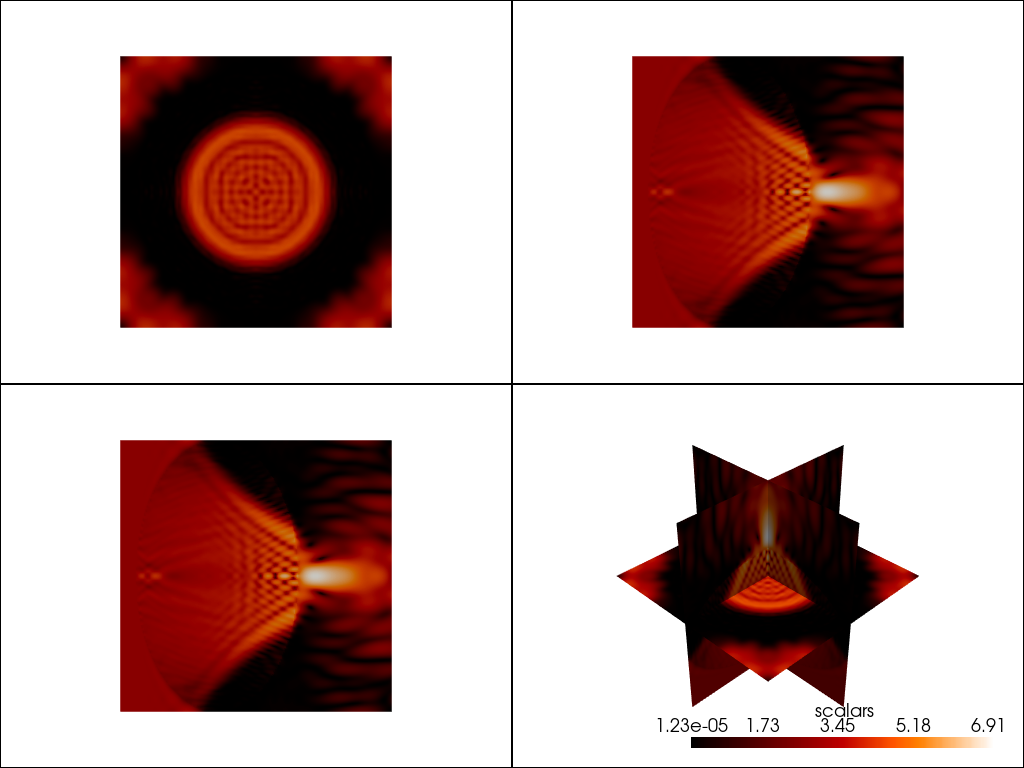

In [101]:
uxyz.draw_XYZ(kind="intensity", drawing="projections", logarithm=1e3)